In [73]:
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pathlib as p
import joblib as j

In [64]:
path = p.Path('../data/processed/data_set.csv')

df = pd.read_csv(path)
df.head()

,id,periodo_inicio,edad,estado_civil,genero,residencia,estrato,pih_0,pnf_0,tr_0,...,pih_64,pnf_64,tr_64,pih_65,pnf_65,tr_65,pih_66,pnf_66,tr_66,estado_final
0,1,202310,32,0,1,0,2,0.0,0.0,0,...,4,4.6,0,4,4.6,0,0,0.0,0,2
1,2,202160,39,0,1,0,2,0.0,0.0,0,...,0,0.0,0,0,0.0,0,0,0.0,0,1
2,3,202210,31,0,1,0,1,0.0,0.0,0,...,4,3.7,0,4,3.7,0,0,0.0,0,2
3,4,201960,32,0,1,0,2,3.0,4.4,0,...,4,4.6,1,4,4.6,1,4,4.8,1,2
4,5,201960,35,0,1,1,2,4.0,4.6,0,...,4,4.5,1,4,4.5,1,2,4.8,0,1


In [65]:
df = df[(df['estado_final'] == 1) | (df['estado_final'] == 0) ]
df.head()

,id,periodo_inicio,edad,estado_civil,genero,residencia,estrato,pih_0,pnf_0,tr_0,...,pih_64,pnf_64,tr_64,pih_65,pnf_65,tr_65,pih_66,pnf_66,tr_66,estado_final
1,2,202160,39,0,1,0,2,0.0,0.0,0,...,0,0.0,0,0,0.0,0,0,0.0,0,1
4,5,201960,35,0,1,1,2,4.0,4.6,0,...,4,4.5,1,4,4.5,1,2,4.8,0,1
5,6,201910,35,0,1,1,2,0.0,0.0,0,...,4,4.8,0,4,4.8,0,4,4.8,0,0
7,8,202220,25,0,1,0,2,3.5,2.3,3,...,4,1.7,0,4,1.7,0,20,4.5,0,1
8,9,202220,27,0,1,0,2,4.0,2.7,3,...,4,3.7,0,4,3.7,0,0,0.0,0,1


In [66]:
# [Preparar los datos]
X = df.drop('estado_final',axis=1) # Esto es con lo que vamos a entrenar el modelo
y = df['estado_final'] # Lo probaremos con estos datos

In [67]:
X_train ,X_test, y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state= 1)

# Tamaño del conjunto de prueba del 20 %
# random_state es como la semilla para reproducir la misma aleatoriedad

In [68]:
model = LogisticRegression(max_iter=5000) # Se crea el modelo

model.fit(X_train, y_train) # Se entrena el modelo

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [ ]:
y_pred = model.predict(X_test)

print('Accuracy Score',accuracy_score(y_test,y_pred))

print('Matriz de confusion',confusion_matrix(y_test,y_pred))

print('Classification Report',classification_report(y_test,y_pred))

Accuracy Score 0.9285714285714286
Matriz de confusion [[10  0]
 [ 1  3]]
Classification Report               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.75      0.86         4

    accuracy                           0.93        14
   macro avg       0.95      0.88      0.90        14
weighted avg       0.94      0.93      0.93        14



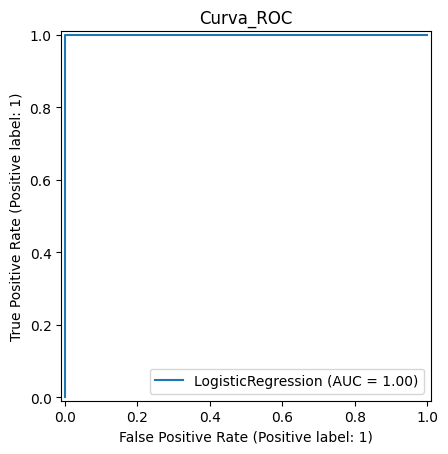

In [70]:
RocCurveDisplay.from_estimator(model,X_test,y_test)

plt.title('Curva_ROC')
plt.show()

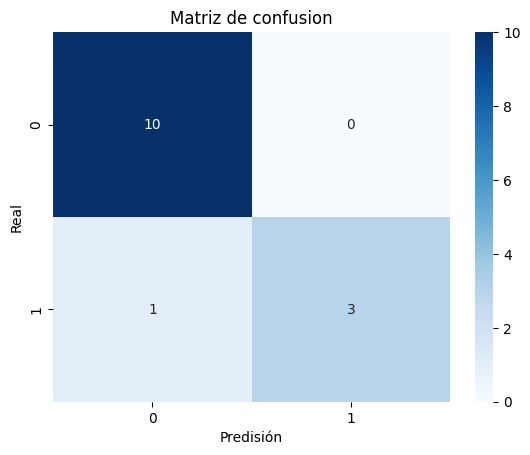

In [71]:
matriz_confusion = confusion_matrix(y_test,y_pred)

sbn.heatmap(matriz_confusion,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predisión')
plt.ylabel('Real')
plt.title('Matriz de confusion')
plt.show()

In [ ]:
path_save = p.Path('../src/models/modelo_regresion_logistica.pkl')
j.dump(model,path_save)

['..\\src\\models\\modelo_regresion_logistica.pkl']